<a href="https://colab.research.google.com/github/Onyimatics/nlp_tweets_classification/blob/master/NLP_Blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: **Onyinye Ezike**

Student ID: **24156343**

Module: **CMP7229 Applied AI**

Program: **MSc Artificial Intelligence With Professional Placement**

Lecturer: **Dr Muhammad Afzal**

School: **Birmingham City University**

Date: **February 2025**

[link To Best Model](https://colab.research.google.com/drive/18-GD1m5JTd14KoWXyUV03HlYpZkETIGg?usp=sharing)

[Link To All Experiment](https://colab.research.google.com/drive/1wLs5rPgTOcUAUNLl5rImf00w2npNb_1J?usp=sharing)

#**IDENTIFYING OFFENSIVE POSTS IN SOCIAL MEDIA USING NLP**

Offensive content has become rather common on social media, adversely impacting individuals, organisations, and society as a whole. One of the most common strategies to tackle this problem is to build systems capable of recognising offensive content, which can then be deleted or set aside for human moderation. This blog explains my implementation on an automated system that detects offensive languages on social media posts, categorizing them as Not Offensive (NOT), Targeted Insult (TIN), or Untargeted (UNT). Dataset of 13240 tweets were used.












**THE EXPERIMENTS**
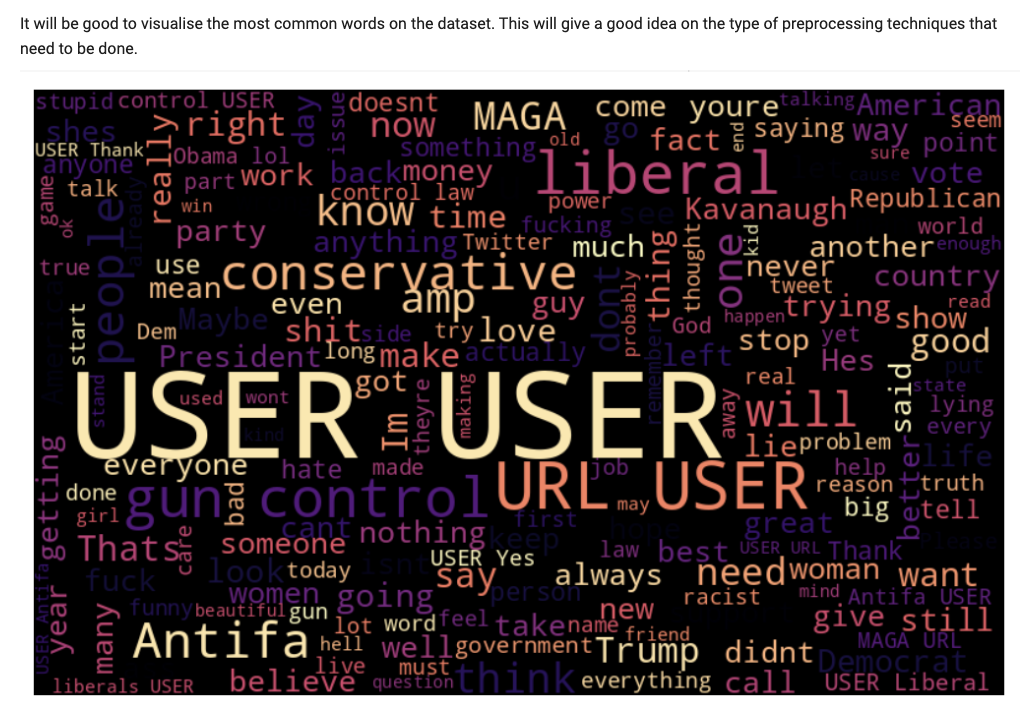

The dataset had no missing values or duplicates. Preprocessing began with tokenization, using [NLTK](https://www.nltk.org/)'s TweetTokenizer for its ability to handle social media elements like hashtags and elongated words. Various text normalization techniques were experimented, including WordNet and SpaCy lemmatization, as well as Porter, Snowball, and Lancaster stemming. SpaCy performed best due to its superior contextual understanding and modern language support.

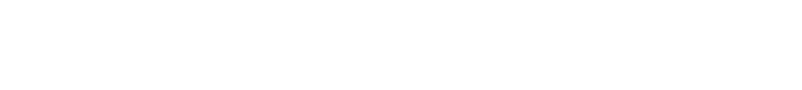

In [ ]:
tweet_tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)

def tokenise_tweet(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'#(\w+)', lambda m: m.group(1).lower(), text)
    text = contractions.fix(text)
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = tweet_tokenizer.tokenize(text)  # Tokenize
    tokens = [token for token in tokens if token not in string.punctuation]
    return ' '.join(tokens)  # Merge tokens back into a sentence

tweet_df['tokenised_tweet'] = tweet_df['tweet'].apply(tokenise_tweet)
test_df['tokenised_tweet'] = test_df['tweet'].apply(tokenise_tweet)

In [ ]:
def spacy_lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct]
    return ' '.join(lemmatized_tokens)

tweet_df['spacy_lemmatised_tweet'] = tweet_df['tokenised_tweet'].apply(spacy_lemmatize_text)
test_df['spacy_lemmatised_tweet'] = test_df['tokenised_tweet'].apply(spacy_lemmatize_text)

tweet_df.head()

The initial analysis showed a class imbalance, with NOT overrepresented and UNT underrepresented. To fix this, SMOTE with an 'auto' sampling strategy was used, successfully balancing the classes, as seen in the distribution plots. Other methods like random resampling and ADASYN were tested, but SMOTE was preferred for maintaining stability and preventing excessive oversampling.

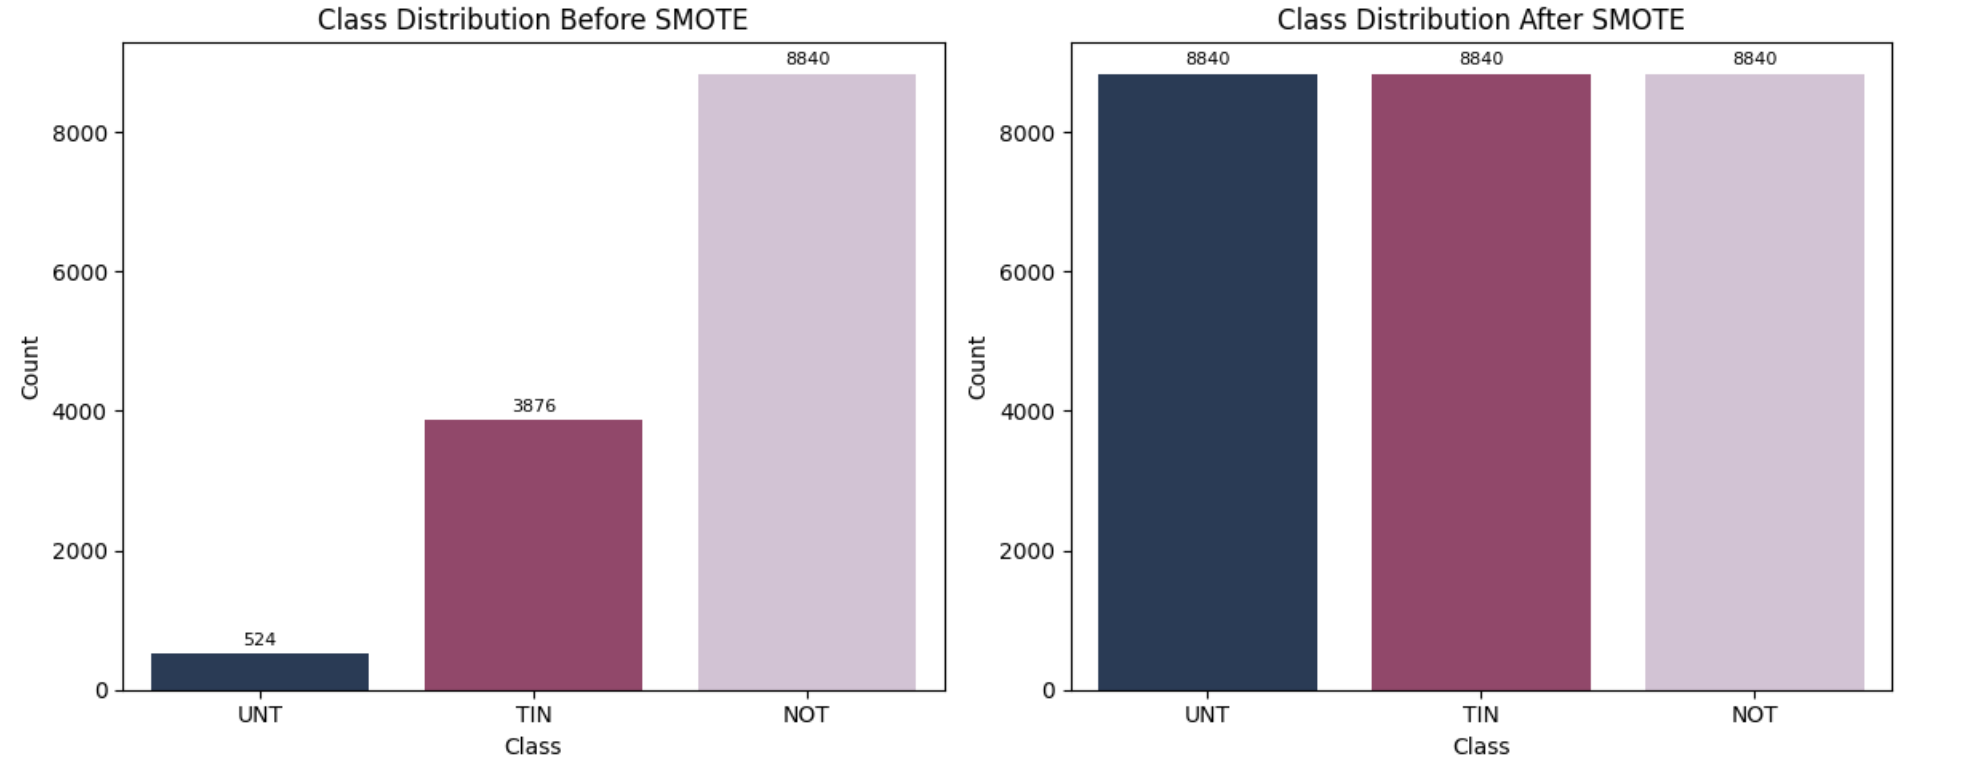

During Feature extraction, CountVectorizer and TF-IDF were used to convertthe texts into numerical features. TF-IDF was used to extract both single words and word pairs (ngrams_range(1,2)). The stop words used was customised to remove some negative words like "no" and "not" due to the nature of the datset. The data was split 70/30 for training and testing, and various models were tested


**EVALUATION AND RESULT**

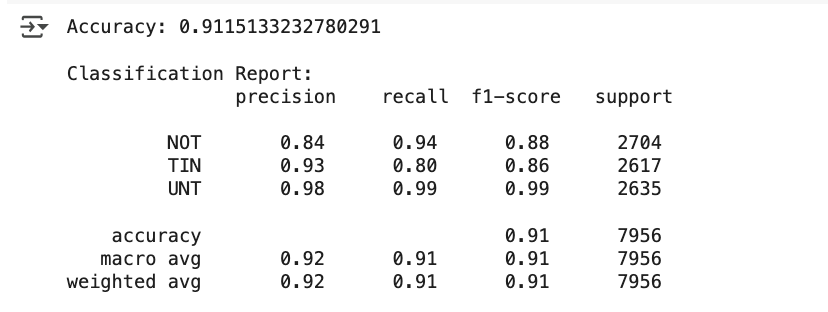

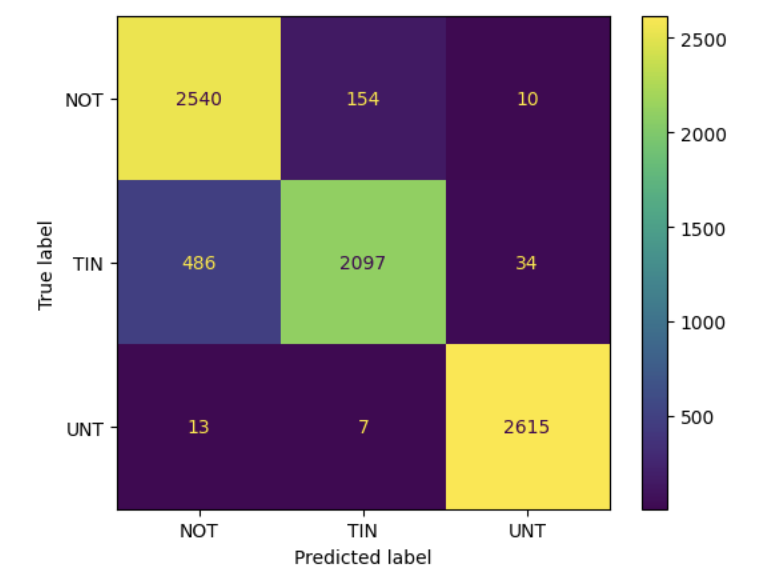

Four machine learning models: SVM, Logistic Regression, RandomForest Classifier, and ExtraTrees Classifier were trained on spaCy-lemmatized tweets. Before balancing the data, ExtraTrees Classifier with CountVectorizer achieved the highest accuracy (75%), followed closely by RandomForest Classifier (74.97%). After applying SMOTE for data balancing, ExtraTrees Classifier, an ensemble method known for handling noise and reducing overfitting, outperformed the rest with a 91.15% accuracy.

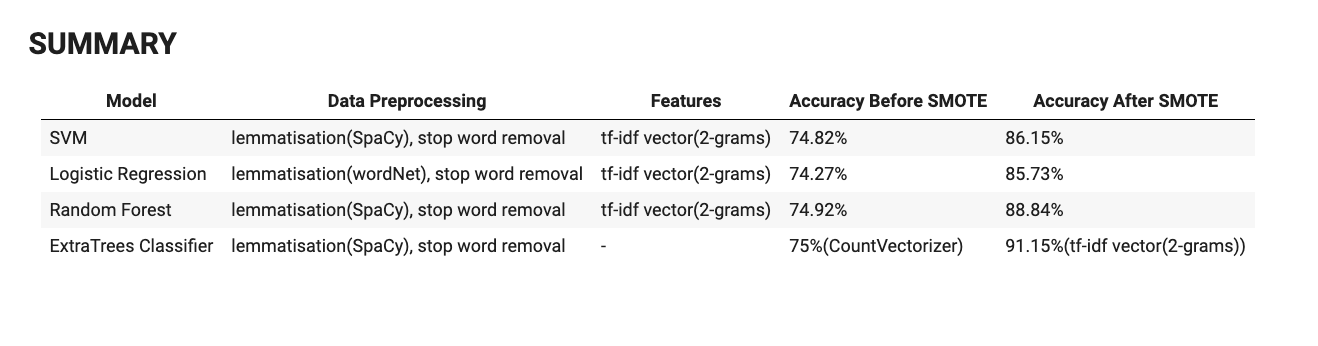